<a href="https://colab.research.google.com/github/afsarahannan/AMT/blob/main/Music_info_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Observing the Discrete Fourier transformation (DFT)**

The Fourier transform can be subdivided into different types of transform. The most basic subdivision is based on the kind of data the transform operates on: continuous functions or discrete functions. In the context of digital audio, the audio data in a WAV file is considered discrete. 

In digital audio, the continuous audio signal captured by a microphone or generated by a source is sampled at regular intervals to convert it into a discrete representation suitable for digital processing and storage. The sampling process converts the continuous-time signal into a sequence of discrete samples.  

When applying the Fourier Transform or its variants like the Discrete Fourier Transform (DFT) or Fast Fourier Transform (FFT) to audio data from a WAV file, it operates on this discrete sequence of samples. The transform analyzes the frequency content of the discrete samples, identifying different frequency components and their respective magnitudes and phases.

So, while the audio waveform represented by a WAV file may correspond to a continuous audio signal in the physical world, the digital representation of the audio data in the file is discrete rather than continuous.


In [3]:
#allow the notebook access to your drive space to store outputs of the notebook 
from google.colab import drive
drive.mount('/content/drive')
dataset_file = '/content/drive/My Drive/music-Phoebe-Bridgers.wav' #stereo data (2-channels)

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, data = wavfile.read(dataset_file)

In [4]:
# Visualize the channels (left-0, right-1)
channel_data_left = data[:, 0]
channel_data_right = data[:, 1]

In [5]:
duration_left = len(channel_data_left) / sample_rate
time_left = np.linspace(0., duration_left, len(channel_data_left))

duration_right = len(channel_data_right) / sample_rate
time_right = np.linspace(0., duration_right, len(channel_data_right))

Text(0.5, 1.0, 'Waveform of audio right channel')

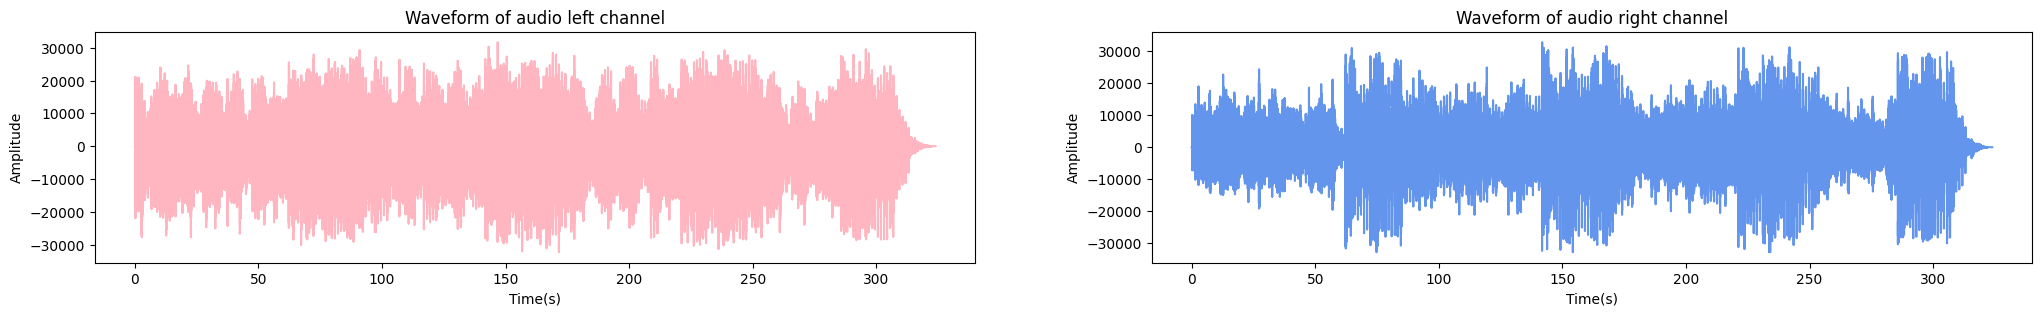

In [5]:
# plt.figure(figsize=(10, 4))

# plt.plot(time, channel_data, color='orange')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Waveform of Audio')
# plt.show()

#create subplots 
fig, axes = plt.subplots(1, 2, figsize=(25, 3))

# Plot Line 1
axes[0].plot(time_left, channel_data_left, label = 'left channel', color = 'lightpink')
axes[0].set_xlabel('Time(s)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title("Waveform of audio left channel") 

# Plot Line 2
axes[1].plot(time_right, channel_data_right, label = 'right channel', color = 'cornflowerblue')
axes[1].set_xlabel('Time(s)')
axes[1].set_ylabel('Amplitude')
axes[1].set_title("Waveform of audio right channel") 



In [ ]:
#Decompose the audio 

In [6]:
# !pip install librosa 
import librosa 

In [7]:
audio_data = dataset_file
x , sr = librosa.load(audio_data)

In [8]:
librosa.load(audio_data, sr=44100)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

Text(0.5, 1.0, 'Spectogram')

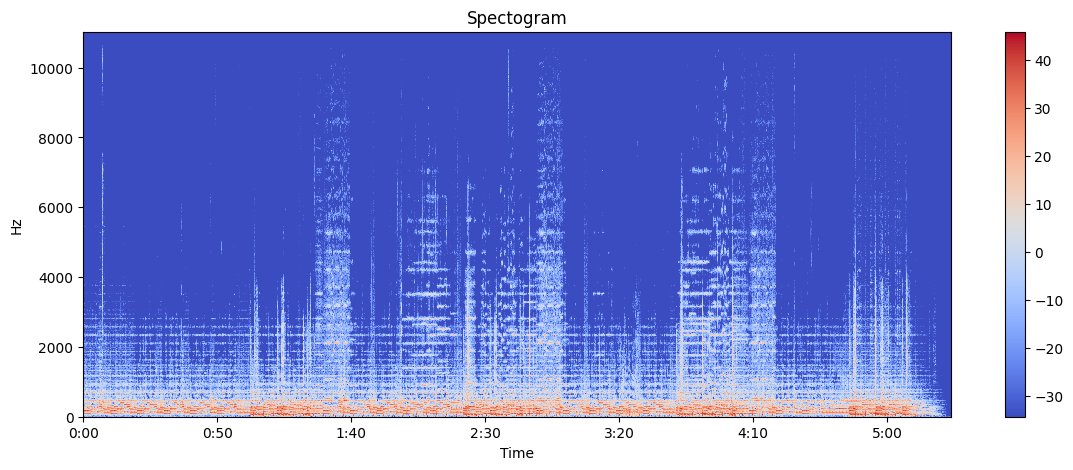

In [9]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectogram")

Spectogram: A visual representation of the signal strength, or “loudness”, of a signal over time at various frequencies present in the waveform

Text(0.5, 1.0, 'logarithimic Spectogram')

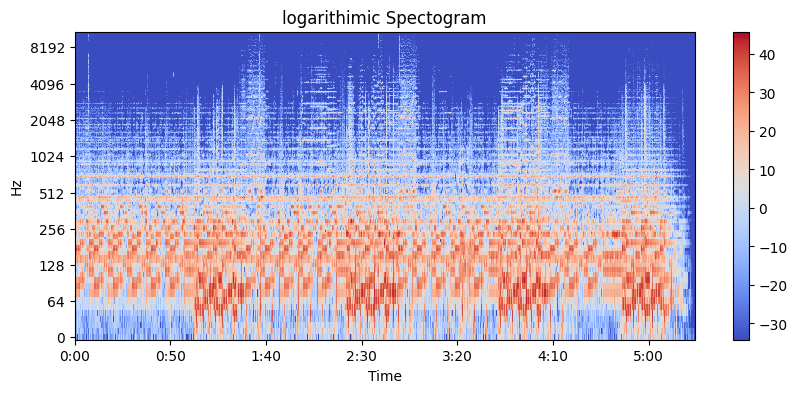

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar() 
plt.title("logarithimic Spectogram")

A zoomed in version of the spectogram to observe that the strong signals are taking place at values of lower frequencies in the song 

In [12]:
#MOTHER CODE for DFT equation 
import numpy as np
import scipy.io.wavfile as wavfile

# Load the audio file
sample_rate, data = wavfile.read(dataset_file) #1 check documentation below 

# Compute the FFT of the audio data
fft_data = np.fft.fft(data) #2 check documentation below 

# Compute the power spectrum of the FFT data
from math import log  
power_spectrum = np.abs(fft_data) ** 2 #3  check documentation below 

# Compute the frequencies corresponding to each point in the FFT data
freqs = np.fft.fftfreq(len(data), 1 / sample_rate)

# Plot the power spectrum as a function of frequency
import matplotlib.pyplot as plt

# plt.plot(freqs[:len(freqs)//2], power_spectrum[:len(power_spectrum)//2])
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')


In audio processing, a stereo audio file typically consists of two channels: the left channel and the right channel. Each channel represents the audio signal captured by a separate microphone or speaker. The 2 ndarray obtained represents the audio data for each channel.

The audio file has a sample rate of 44100, when audio is recorded or converted into a digital format, it is divided into small, discrete samples taken at regular intervals. The sampling rate specifies how many of these samples are taken per second. A sampling rate of 44100 means that 44,100 samples are captured every second. For example, with a sampling rate of 44100 Hz, 44100 samples are captured per second. This means that the analog audio waveform is divided into 44100 individual points, and the amplitude of the audio signal is measured and stored at each of these points.

*#1* The shape of data variable (14285824, 2) indicates that you have a total of 14,285,824 samples in our audio file, and each sample contains two values corresponding to the left and right channels.

To access the individual channels, you can use indexing on the ndarray. For example, **data[:, 0]** will give you the data for the left channel, and data[:, 1] will give you the data for the right channel.  

*#2* When we pass the data array to **np.fft.fft(data)**, it calculates the complex-valued Fourier transform of the input signal ie. FFT is an algorithm that computes the discrete Fourier transform (DFT), which transforms a signal from the time domain to the frequency domain. The resulting array contains the frequency domain representation of the input signal. The output of np.fft.fft(data) will have the same shape as the input data array. 

Each element of the output array represents the complex amplitude of a specific frequency component. The first element corresponds to the DC component (frequency 0), and subsequent elements represent positive and negative frequencies up to the Nyquist frequency (half the sampling rate) . 
 
*#3* The FFT returns complex numbers representing the magnitude and phase of each frequency component. To calculate the power at each frequency, we need to consider both the magnitude and phase. However, in many cases, the phase information is not as relevant as the magnitude.

By squaring the absolute values, we discard the phase information and obtain the power spectrum, which is a real-valued representation of the signal's energy at different frequencies. This simplification allows for easier interpretation and analysis of the frequency content in the signal.


In [11]:
#baby codes part 2

import numpy as np
import scipy.io.wavfile as wavfile

# Load the audio file
sample_rate, data = wavfile.read(dataset_file) 

# Compute the FFT of the audio data
fft_data = np.fft.fft(data)

# Compute the power spectrum of the FFT data (y-axis)
from math import log  

power_spectrum = np.abs(fft_data) **2 

# Compute the frequencies corresponding to each point in the FFT data (x-axis)
freqs = np.fft.fftfreq(len(data), 1 / sample_rate)



Text(0.5, 1.0, 'Audio signal in the frequency domain \n DFT right channel')

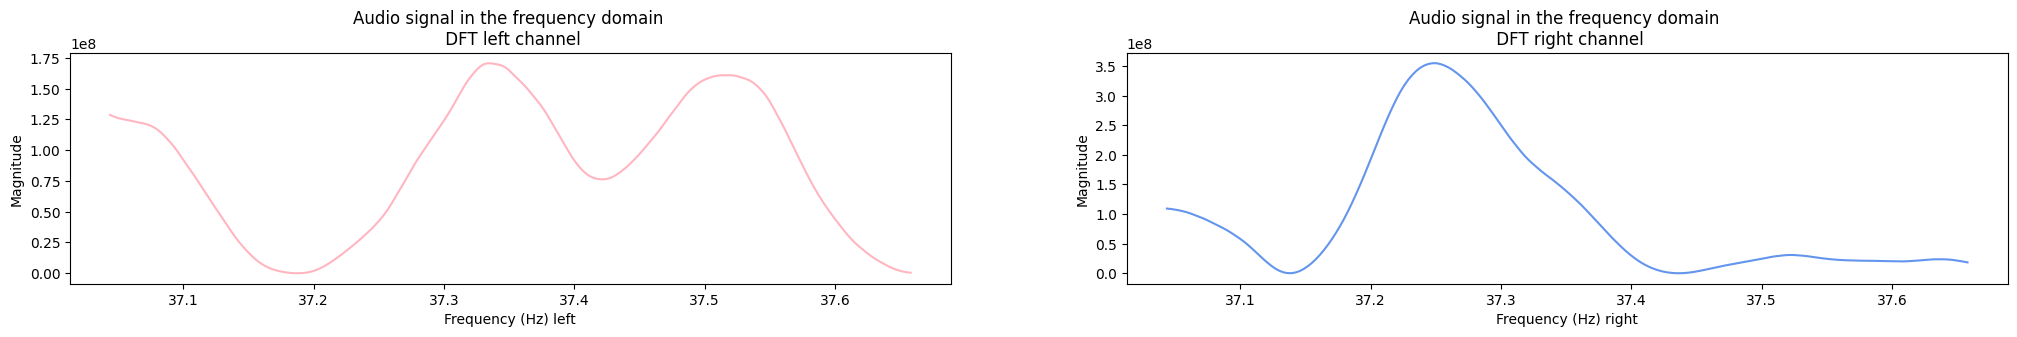

In [12]:
# Plot the power spectrum(magnitude) against frequency
import matplotlib.pyplot as plt

#create subplots 
fig, axes = plt.subplots(1, 2, figsize=(25, 3))

#these plots contain the frequency vs magnitude values for only 200 second starting from 12000th second of the song 

# Plot Line 1 
axes[0].plot(freqs[12000:12200], power_spectrum[12000:12200][:,0], label = 'left channel', color = 'lightpink') #//2 # len(freqs)//1170, len(power_spectrum)//1170
axes[0].set_xlabel('Frequency (Hz) left')
axes[0].set_ylabel('Magnitude')
axes[0].set_title("Audio signal in the frequency domain \n DFT left channel") 

# Plot Line 2
axes[1].plot(freqs[12000:12200], power_spectrum[12000:12200][:,1], label = 'right channel', color = 'cornflowerblue') #//2
axes[1].set_xlabel('Frequency (Hz) right')
axes[1].set_ylabel('Magnitude')
axes[1].set_title("Audio signal in the frequency domain \n DFT right channel")




It's important to note that the DFT itself operates on discrete data and produces a discrete set of frequency components. However, you can obtain a more continuous visual representation by selecting samples or using interpolation techniques to **estimate values between the frequency bins**(there are infinite amount of data which cannot be observed in discrete manner). This can provide a smoother and more continuous graph, but it still represents the underlying discrete frequency components calculated by the DFT.

Text(0.5, 1.0, 'Audio signal in the frequency domain \n DFT right channel')

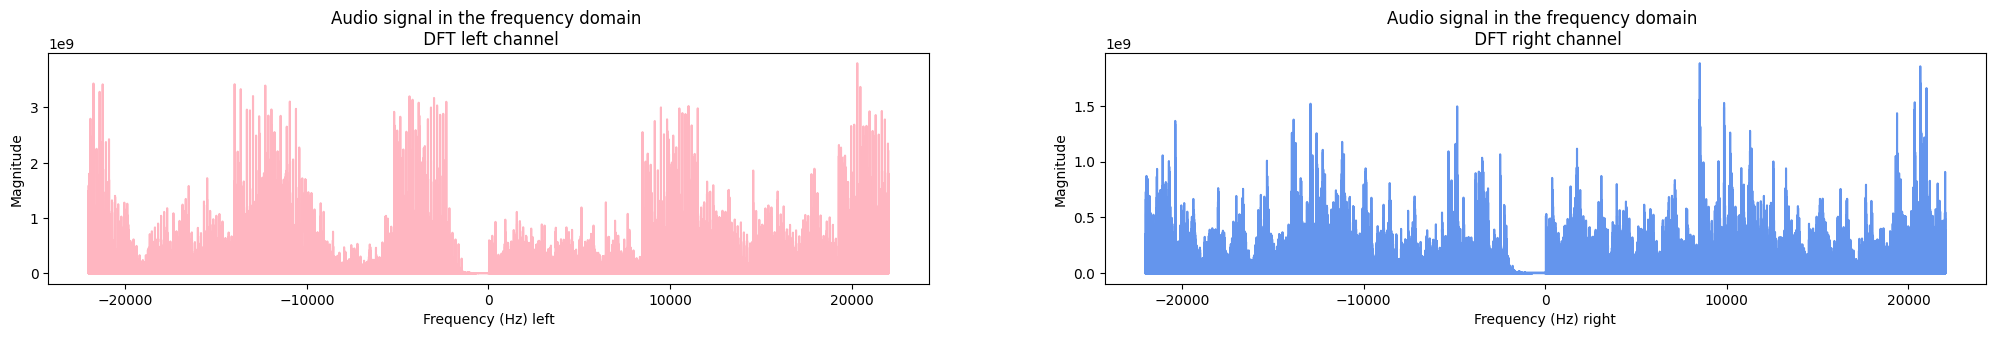

In [15]:
#the whole picture 
# Plot the power spectrum(magnitude) against frequency
import matplotlib.pyplot as plt

#create subplots 
fig, axes = plt.subplots(1, 2, figsize=(25, 3))

axes[0].plot(freqs, power_spectrum[:,0], label = 'left channel', color = 'lightpink')
axes[0].set_xlabel('Frequency (Hz) left')
axes[0].set_ylabel('Magnitude')
axes[0].set_title("Audio signal in the frequency domain \n DFT left channel") 

# Plot Line 2
axes[1].plot(freqs, power_spectrum[:,1], label = 'right channel', color = 'cornflowerblue')
axes[1].set_xlabel('Frequency (Hz) right')
axes[1].set_ylabel('Magnitude')
axes[1].set_title("Audio signal in the frequency domain \n DFT right channel")

**-----------------------------------------------------------------------------------------------------------------------------------------------------**

#Using scipy library for decomposition of sinusoidal signals 

An audio signal is a summation of a combination of sine and cosine equations. We will use the scipy library to fit a sinusoidal equation to the audiowave data we have in order to extract the individual frequency and amplitudes.  

DFT equation 

$X_k=∑x_ne^{−i2πkn/N}$   

$e^{−i2πkn/N} = cos(2πkn/N)−i⋅sin(2πkn/N)$  

$X_k= ∑x_n cos(2πkn/N)−i⋅sin(2πkn/N)$ 


$N$ = number of samples

$n$ = current sample #np.arange(0,no. of samples,$1/N$)

$k$ = current frequency, where k∈[0,N−1]

$x_n$
 = the sine value at sample n

$X_k$
 = The DFT which include information of both amplitude and phase


In [ ]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)


In [5]:
# Import the required packages
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
signal_left = data[:,0]
data_fourier = fft(signal_left) #this contains an array of real and complex values 

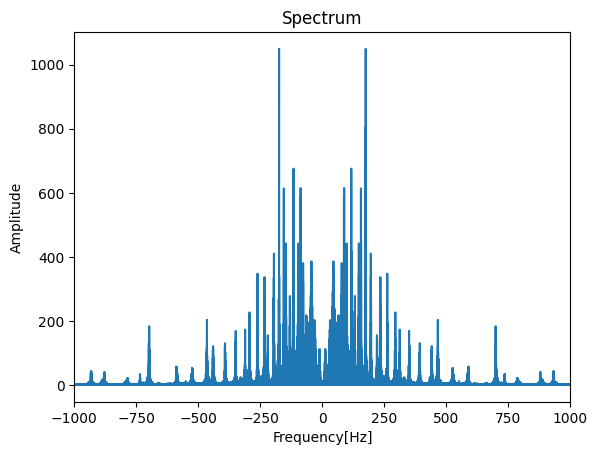

In [56]:
# Calculate N/2 to normalize the FFT output 
N = len(signal_left)
normalize = N/2 
#because according to sampling theorem, signals are sampled 
#at a twice the frequency of the original signal

# Get the frequency components of the spectrum
sampling_rate = 44100 
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(data_fourier)/normalize

# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.xlim(-1000,1000) #set the x-limits because there isn't much beyond the range (-1000,1000] 
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum for the left channel')
plt.show()

In the image above we are observing the frequencies, which form a symmetry at the zero line. This is because the DFT is a complex function that is composed of two parts, the real and the imaginary. The real part is observed to the right of the zero line which has even symmetry property.  

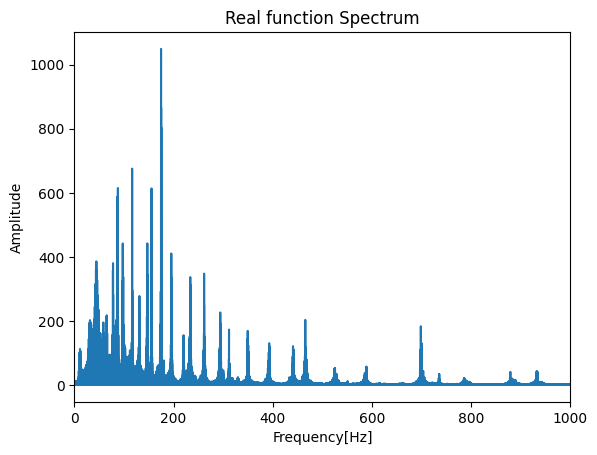

In [59]:
# Plot the actual spectrum of the signal(real number realm)
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(signal_left))/N)
plt.xlim(0,1000)
plt.title('Real function Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()

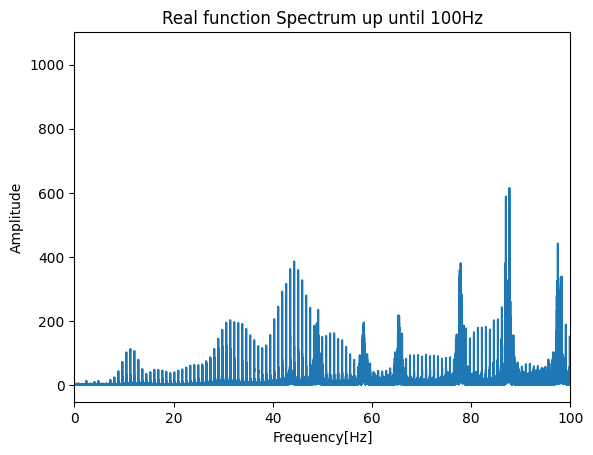

In [63]:
# Plot the actual spectrum of the signal
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(signal_left))/N)
plt.xlim(0,100)
plt.title('Real function Spectrum up until 100Hz')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()

We can extract values for the amplitude and its corresponding frequencies from this graph and deconstruct the entire audio data one wave at a time represented by $cos(2πkn/N)−i⋅sin(2πkn/N)$  
 

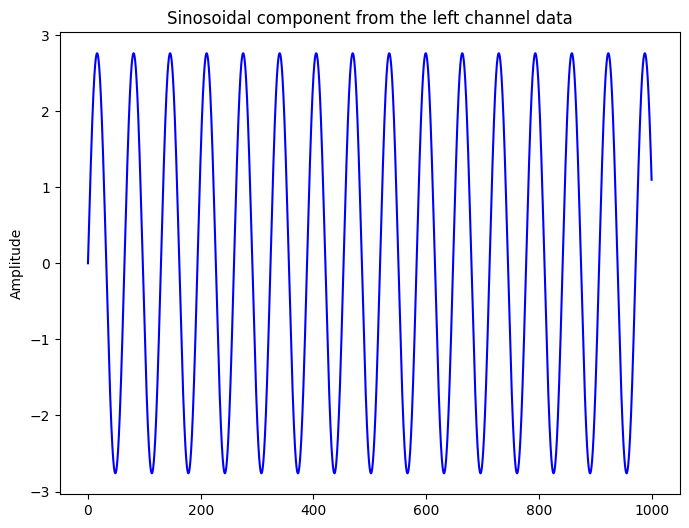

In [86]:
# sampling rate
sr = 44100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1000,ts)

frequency = rfftfreq(N, d=1/sampling_rate)
amplitude = 2*np.abs(rfft(signal_left))/N

freq = frequency[5]
A = amplitude[5]
x = A*np.sin(2*np.pi*freq*t)

#ploting the sinosoidal curve from the 5th position of the spectrum 
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'blue')
plt.ylabel('Amplitude')
plt.title("Sinosoidal component from the left channel data") #there are 7,142,912 more to go [total 7,142,913]

plt.show()

In [ ]:
# #function to store all the individual sinusoidal components in an empty ndarray 
#   all_sine = np.empty(shape = [N,len(amplitude)]) 

# # sampling rate
#   sr = 44100
# # sampling interval
#   ts = 1.0/sr
#   t = np.arange(0,1000,ts)

#   frequency = rfftfreq(N, d=1/sampling_rate)
#   amplitude = 2*np.abs(rfft(signal_left))/N

#   freq = frequency
#   A = amplitude
#   all_sine = A*np.sin(2*np.pi*freq*t)

##DO NOT RUN THIS CELL IF THE AUDIOFILE IS LONGER THAN 1 MINUTE FOR REASONS OF LIMITED SPACE##

#**MIDI data analysis** 

In [87]:
!pip install mido 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.2 MB/s eta 0:00:00


In [90]:
import mido 
from mido import MidiFile 

In [91]:
#load the midi file 
mid = MidiFile('/content/drive/MyDrive/music-Phoebe-Bridgers_basic_pitch.mid')

In [93]:
#observing only the note on messages that play a musical note, the note-off messages are non-playable 
for i, track in enumerate(mid.tracks):
    print(f'Track {i}: {track.name}')
    for msg in track:
        if msg.type == 'note_on':
            print(f'Note: {msg.note}, Velocity: {msg.velocity}, Time: {msg.time}')

Streaming output truncated to the last 5000 lines.
Note: 57, Velocity: 47, Time: 5
Note: 57, Velocity: 0, Time: 36
Note: 58, Velocity: 0, Time: 10
Note: 58, Velocity: 58, Time: 0
Note: 46, Velocity: 62, Time: 25
Note: 50, Velocity: 0, Time: 0
Note: 51, Velocity: 40, Time: 0
Note: 58, Velocity: 0, Time: 6
Note: 58, Velocity: 63, Time: 0
Note: 58, Velocity: 0, Time: 40
Note: 58, Velocity: 75, Time: 0
Note: 65, Velocity: 0, Time: 6
Note: 50, Velocity: 42, Time: 20
Note: 51, Velocity: 0, Time: 0
Note: 46, Velocity: 0, Time: 36
Note: 58, Velocity: 0, Time: 15
Note: 58, Velocity: 70, Time: 0
Note: 46, Velocity: 42, Time: 61
Note: 50, Velocity: 0, Time: 5
Note: 50, Velocity: 51, Time: 6
Note: 55, Velocity: 48, Time: 5
Note: 58, Velocity: 0, Time: 0
Note: 58, Velocity: 47, Time: 0
Note: 46, Velocity: 0, Time: 15
Note: 46, Velocity: 45, Time: 5
Note: 62, Velocity: 0, Time: 0
Note: 60, Velocity: 56, Time: 10
Note: 27, Velocity: 51, Time: 21
Note: 55, Velocity: 0, Time: 0
Note: 55, Velocity: 49, 

Each row is a midi event where the 'Note' represents the musical chord played at each midi event. For instance, the music starts with note ranging from 57, 58, 46, 50 ,51 ,58 which is the A, A# on the 2 ocatve followed by A# on the 1 octave, D, D# 2 octave ends on A chord 2 octave. 

Midi Notes sheet for reference 
https://computermusicresource.com/midikeys.html 

The Velocity refers to the intensity at which the chord is played, this also ranges from 0 to 127. 

The time note refers to the time interval between the two notes played from one midi event moving to the next. 

In [103]:
# Load the MIDI file
mid = mido.MidiFile('/content/drive/MyDrive/music-Phoebe-Bridgers_basic_pitch.mid')

In [126]:
#extract the BPM 
def get_tempo(mid):
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempo = mido.tempo2bpm(msg.tempo)
                return tempo
    return None

# Get the tempo value from the MIDI file
tempo = get_tempo(mid)

if tempo is not None:
    print(f"The tempo of the MIDI file is: {tempo} BPM")
else:
    print("Tempo information not found in the MIDI file.")

The tempo of the MIDI file is: 120.0 BPM


In [127]:
import mido
import numpy as np
import matplotlib.pyplot as plt

def midi_to_piano_roll(mid):
    ticks_per_beat = mid.ticks_per_beat #220 
    tempo = 500000  # Default tempo in case there's no tempo change event (microseconds per beat), 500000

    # Find the tempo value from the first tempo change event, if present
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempo = msg.tempo
                break

    # Calculate time per tick based on tempo and ticks per beat
    time_per_tick = tempo / ticks_per_beat

    # Create a list to store the piano roll
    piano_roll = []

    # Iterate through each track and collect note-on and note-off events
    for track in mid.tracks:
        notes = []
        current_time = 0

        for msg in track:
            current_time += msg.time * time_per_tick

            if msg.type == 'note_on' and msg.velocity > 0:
                note = (msg.note, current_time, 0)  # (pitch, start_time, end_time)
                notes.append(note)

            elif msg.type == 'note_off' or (msg.type == 'note_on' and msg.velocity == 0):
                notes_to_remove = []  # Store notes that need to be removed
                for i, note in enumerate(notes):
                    if note[0] == msg.note and note[2] == 0:
                        note_end_time = current_time
                        note = (note[0], note[1], note_end_time)
                        piano_roll.append(note)
                        notes_to_remove.append(i)

                # Remove the notes after iterating through the list
                for i in reversed(notes_to_remove):
                    del notes[i]

    # Convert the piano roll into a numpy array
    piano_roll = np.array(piano_roll)

    # Calculate the number of unique pitches and time steps
    unique_pitches = np.unique(piano_roll[:, 0])
    num_pitches = len(unique_pitches)
    end_time = np.max(piano_roll[:, 2])
    time_steps = int(np.ceil(end_time / time_per_tick)) + 1

    # Create an empty piano roll matrix
    roll = np.zeros((num_pitches, time_steps))

    # Fill in the piano roll matrix with note events
    for note in piano_roll:
        pitch = np.where(unique_pitches == note[0])[0][0]
        start_time = int(note[1] / time_per_tick)
        end_time = int(note[2] / time_per_tick)
        roll[pitch, start_time:end_time] = 1

    return roll

In [128]:
# Convert MIDI to piano roll
piano_roll = midi_to_piano_roll(mid)


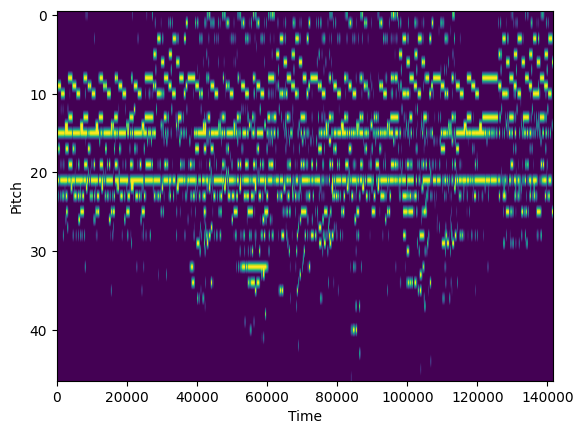

In [130]:
# Display the piano roll with a colorful colormap
plt.imshow(piano_roll, aspect='auto', cmap='viridis')  # Use 'rainbow' colormap for color variation
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.show()